<a href="https://colab.research.google.com/github/vijaygwu/IntroToDeepLearning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification with PyTorch


This is a PyTorch implementation of two neural networks: one **with** an activation function (ReLU) and one **without** an activation function, applied to the **Moons dataset** from `sklearn.datasets`. The code compares the performance of both models.

### Steps:
1. **Load and preprocess the Moons dataset**.
2. **Define the neural network models (with and without an activation function)**.
3. **Train both models**.
4. **Visualize and compare the results**.


### Explanation of the Code:

1. **Data Preparation**:
   - **`make_moons`**: Generates a synthetic 2D dataset with two interleaving moon-shaped clusters. It’s a binary classification problem.
   - **`train_test_split`**: Splits the dataset into 70% training and 30% test sets.
   - **`StandardScaler`**: Standardizes the data by scaling features to have a mean of 0 and a standard deviation of 1.

2. **Model Definitions**:
   - **Model 1: Without Activation**: The model consists of three fully connected layers (`fc1`, `fc2`, `fc3`), but no activation function is applied between the layers.
   - **Model 2: With Activation (ReLU)**: The same architecture as Model 1, but ReLU activation is applied after each hidden layer. ReLU allows the model to learn non-linear patterns.

3. **Training**:
   - Both models are trained using Stochastic Gradient Descent (SGD) and cross-entropy loss. The training loop runs for 500 epochs, and the loss is printed every 100 epochs for monitoring.

4. **Evaluation**:
   - After training, both models are evaluated on the test set, and the accuracy is computed.

5. **Visualization**:
   - Decision boundaries are plotted for both models. This visualizes how well the models separate the two classes in the dataset.

### Results:

- **Model Without Activation Function**: Since the model only performs linear transformations, its ability to learn complex decision boundaries is limited.
- **Model With ReLU Activation Function**: The ReLU activation introduces non-linearity, allowing the model to capture more complex decision boundaries and achieve better classification performance.

### Visual Comparison:
The decision boundary plot will show that the model **with ReLU** learns a more complex, non-linear boundary that better fits the moon-shaped data, while the model **without activation** struggles to learn a proper decision boundary and likely performs worse on the test set.

### Key Differences:
- **Test Accuracy**: The model with activation should show a noticeably higher accuracy than the one without activation.
- **Decision Boundary**: The model without activation will have a linear decision boundary, while the model with activation will have a non-linear boundary, better capturing the moons' shape.


Training Model Without Activation Function
Epoch [100000/500000], Loss: 0.2966
Epoch [200000/500000], Loss: 0.2966
Epoch [300000/500000], Loss: 0.2966
Epoch [400000/500000], Loss: 0.2966
Epoch [500000/500000], Loss: 0.2966

Training Model With ReLU Activation Function
Epoch [100000/500000], Loss: 0.0477
Epoch [200000/500000], Loss: 0.0419
Epoch [300000/500000], Loss: 0.0380
Epoch [400000/500000], Loss: 0.0346
Epoch [500000/500000], Loss: 0.0322

Test Accuracy Without Activation Function: 0.8767
Test Accuracy With ReLU Activation Function: 0.9800


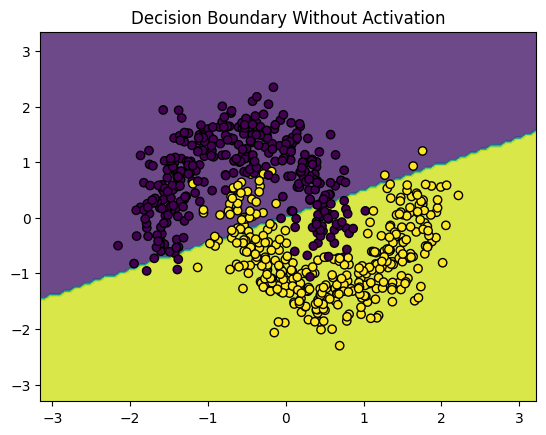

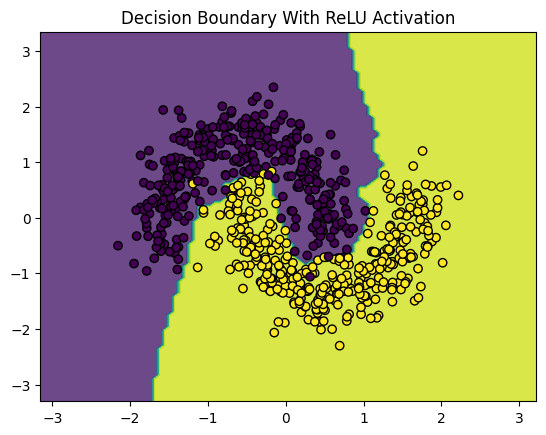

In [4]:


import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and Preprocess the Moons Dataset
# Generate the moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train).long()  # For classification, we need integer labels
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test).long()

# 2. Define Neural Networks

# Model 1: Without Activation Function
class ModelWithoutActivation(nn.Module):
    def __init__(self):
        super(ModelWithoutActivation, self).__init__()
        self.fc1 = nn.Linear(2, 32)  # Input size 2 (for 2D moon data), hidden size 32
        self.fc2 = nn.Linear(32, 32)  # Hidden layer 32 neurons
        self.fc3 = nn.Linear(32, 2)   # Output 2 (binary classification)

    def forward(self, x):
        x = self.fc1(x)  # Linear transformation without activation
        x = self.fc2(x)  # Linear transformation without activation
        x = self.fc3(x)  # Linear transformation without activation
        return x

# Model 2: With ReLU Activation Function
class ModelWithActivation(nn.Module):
    def __init__(self):
        super(ModelWithActivation, self).__init__()
        self.fc1 = nn.Linear(2, 32)  # Input size 2 (for 2D moon data), hidden size 32
        self.fc2 = nn.Linear(32, 32)  # Hidden layer 32 neurons
        self.fc3 = nn.Linear(32, 2)   # Output 2 (binary classification)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation after first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation after second layer
        x = self.fc3(x)  # Output layer (no activation for output logits)
        return x

# 3. Define Training Function
def train(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs=500000):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        # Forward pass: Compute predictions
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()  # Zero gradients
        loss.backward()  # Backpropagate the gradients
        optimizer.step()  # Update weights

        # Print loss every 100 epochs
        if (epoch+1) % 100000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 4. Define Evaluation Function
def evaluate(model, X_test_tensor, y_test_tensor):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # No need to compute gradients for evaluation
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)  # Get the predicted class
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    return accuracy

# 5. Train and Compare Models

# Loss function (Cross-Entropy for classification)
criterion = nn.CrossEntropyLoss()

# Model 1: Without Activation Function
model_no_activation = ModelWithoutActivation()
optimizer_no_activation = optim.SGD(model_no_activation.parameters(), lr=0.01)
print("\nTraining Model Without Activation Function")
train(model_no_activation, X_train_tensor, y_train_tensor, optimizer_no_activation, criterion)

# Model 2: With ReLU Activation Function
model_with_activation = ModelWithActivation()
optimizer_with_activation = optim.SGD(model_with_activation.parameters(), lr=0.01)
print("\nTraining Model With ReLU Activation Function")
train(model_with_activation, X_train_tensor, y_train_tensor, optimizer_with_activation, criterion)

# Evaluate both models
accuracy_no_activation = evaluate(model_no_activation, X_test_tensor, y_test_tensor)
accuracy_with_activation = evaluate(model_with_activation, X_test_tensor, y_test_tensor)

print(f"\nTest Accuracy Without Activation Function: {accuracy_no_activation:.4f}")
print(f"Test Accuracy With ReLU Activation Function: {accuracy_with_activation:.4f}")

# 6. Visualize the Results
# Plot decision boundaries for both models

def plot_decision_boundary(model, X, y, title):
    model.eval()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

    with torch.no_grad():
        Z = model(grid).argmax(1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(model_no_activation, X_train, y_train, "Decision Boundary Without Activation")
plot_decision_boundary(model_with_activation, X_train, y_train, "Decision Boundary With ReLU Activation")



## Minibatch

In the above code, **the batch size is equal to the entire training dataset**, which consists of **700 samples**. This means that during training, the model processes all 700 training examples in a single batch for each epoch.

### Explanation:

1. **Dataset Size**:
   - The dataset is generated with 1,000 samples using the `make_moons` function.
   - It's then split into training and test sets:
     ```python
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
     ```
     - **Training Set**: 70% of 1,000 samples = **700 samples**.
     - **Test Set**: 30% of 1,000 samples = 300 samples.

2. **Batch Size in Training Loop**:
   - In the `train` function, the entire training dataset is passed to the model in one go:
     ```python
     def train(model, X_train_tensor, y_train_tensor, optimizer, criterion, num_epochs=500):
         model.train()  # Set model to training mode
         for epoch in range(num_epochs):
             # Forward pass: Compute predictions
             outputs = model(X_train_tensor)
             loss = criterion(outputs, y_train_tensor)
     
             # Backward pass and optimization
             optimizer.zero_grad()  # Zero gradients
             loss.backward()  # Backpropagate the gradients
             optimizer.step()  # Update weights
     
             # Print loss every 100 epochs
             if (epoch+1) % 100 == 0:
                 print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
     ```
   - **No Mini-Batching**: There is no batching mechanism (like a `DataLoader`), so the model processes all 700 training samples at once.
   - **Effective Batch Size**: Therefore, the batch size is **700 samples**, which is the size of the entire training set.

### Implications:

- **Batch Gradient Descent**:
  - The training method used here is **batch gradient descent**, where the gradients are computed over the entire dataset for each update.
  - This is feasible for small datasets but can be computationally expensive and inefficient for larger datasets.

- **Memory Usage**:
  - Processing the entire dataset at once requires sufficient memory to hold all the data and intermediate computations.
  - For larger datasets, this could lead to memory issues.

### Modifying the Code to Use Mini-Batches:

If you want to use a smaller batch size (e.g., 32 or 64), you can modify the code to utilize a `DataLoader` that creates batches of data. Here's how you can adjust the code:

#### Step 1: Create a Dataset and DataLoader

```python
from torch.utils.data import TensorDataset, DataLoader

# Combine features and labels into a TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Define the batch size
batch_size = 32

# Create a DataLoader for the training set
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
```

#### Step 2: Modify the Training Function to Use Batches

```python
def train(model, train_loader, optimizer, criterion, num_epochs=500):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass: Compute predictions
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass and optimization
            optimizer.zero_grad()  # Zero gradients
            loss.backward()  # Backpropagate the gradients
            optimizer.step()  # Update weights

        # Optionally, print the loss after each epoch
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
```

#### Step 3: Update the Training Call

```python
# Train the model with mini-batches
print("\nTraining Model With ReLU Activation Function and Mini-Batches")
train(model_with_activation, train_loader, optimizer_with_activation, criterion)
```

#### Benefits of Using Mini-Batches:

- **Efficient Computation**: Mini-batch training strikes a balance between the robustness of batch gradient descent and the efficiency of stochastic gradient descent.
- **Faster Convergence**: Mini-batches can lead to faster convergence and can help the model generalize better.
- **Memory Management**: Processing smaller batches reduces memory requirements, allowing you to train on larger datasets.






Training Model With ReLU Activation Function and Mini-Batches
Epoch [100/500], Loss: 0.3864
Epoch [200/500], Loss: 0.1084
Epoch [300/500], Loss: 0.0735
Epoch [400/500], Loss: 0.0548
Epoch [500/500], Loss: 0.0293
Test Accuracy With ReLU Activation Function: 0.9800


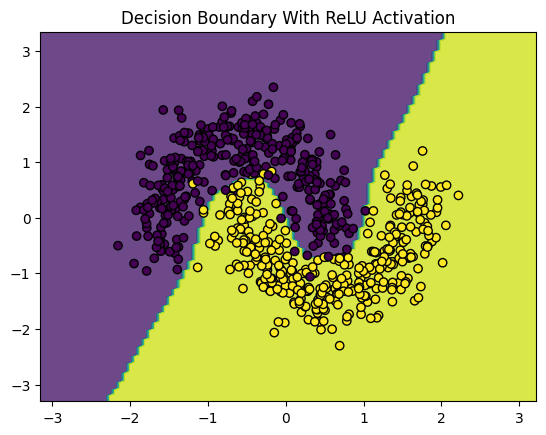

In [13]:
### Classification with Mini-Batches:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# 1. Load and Preprocess the Moons Dataset
# Generate the moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train).long()
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test).long()

# Create a Dataset and DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 32  # Define your batch size here
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Define the model (with activation function)
class ModelWithActivation(nn.Module):
    def __init__(self):
        super(ModelWithActivation, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define the training function using mini-batches
def train(model, train_loader, optimizer, criterion, num_epochs=500):
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Define the evaluation function
def evaluate(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    return accuracy

# Instantiate the model, loss function, and optimizer
model_with_activation = ModelWithActivation()
criterion = nn.CrossEntropyLoss()
optimizer_with_activation = optim.SGD(model_with_activation.parameters(), lr=0.01)

# Train the model
print("\nTraining Model With ReLU Activation Function and Mini-Batches")
train(model_with_activation, train_loader, optimizer_with_activation, criterion)

# Evaluate the model
accuracy_with_activation = evaluate(model_with_activation, X_test_tensor, y_test_tensor)
print(f"Test Accuracy With ReLU Activation Function: {accuracy_with_activation:.4f}")

# Plot the decision boundary
def plot_decision_boundary(model, X, y, title):
    model.eval()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 200))
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)

    with torch.no_grad():
        Z = model(grid).argmax(1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for the trained model
plot_decision_boundary(model_with_activation, X_train, y_train, "Decision Boundary With ReLU Activation")


### Softmax and Crossenthrophy

 We **did not explicitly apply the Softmax** activation function to the output layer of the neural network because **PyTorch's `CrossEntropyLoss` implicitly applies it for us**. Here's a detailed explanation of why we don't need to use Softmax:

### 1. **What is Softmax?**
Softmax is an activation function typically applied to the output layer in classification tasks where the goal is to predict the probability distribution over multiple classes. For an output vector \(\mathbf{z} = [z_1, z_2, \dots, z_n]\), the Softmax function converts the raw output (logits) into a probability distribution by ensuring that:
   - Each output value lies in the range \([0, 1]\).
   - The sum of all output values is equal to 1.

### 2. **Why No Explicit Softmax in This Code?**
We used PyTorch's `nn.CrossEntropyLoss()` as our loss function, which is common for classification problems. The important thing to understand is that:

- **`nn.CrossEntropyLoss()` combines two operations:**
  1. **`LogSoftmax`**: Converts the raw output (logits) into log-probabilities.
  2. **`Negative Log-Likelihood Loss` (NLLLoss)**: Computes the loss by comparing these log-probabilities to the true class labels.

Therefore, when using `CrossEntropyLoss()`, **you should provide the raw logits** (un-normalized scores from the output layer). This is because `CrossEntropyLoss` will first apply `LogSoftmax` internally before calculating the loss.

### 3. **How It Works in Our Code**:
In the provided code, we do **not** apply Softmax manually to the output of the models because `CrossEntropyLoss` expects raw logits.

For example, in this part of the code:
```python
outputs = model(X_train_tensor)
loss = criterion(outputs, y_train_tensor)
```

- The `outputs` from the model are raw scores (logits) produced by the final linear layer.
- `CrossEntropyLoss` internally applies Softmax to these logits to compute the loss, so we don't need to explicitly apply it in the model.

### 4. **When Should You Use Softmax?**
You would manually apply Softmax in the following scenarios:
- **Post-training for inference or prediction**: If you want to obtain the probabilities of each class (e.g., for decision making or for further processing), you can apply Softmax to the output logits during inference.
  
  Example:
  ```python
  probabilities = torch.softmax(outputs, dim=1)  # Apply Softmax to get probabilities
  ```

